In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [7]:
url = 'https://raw.githubusercontent.com/AshishJangra27/Machine-Learning-with-Python-GFG/main/Linear%20Regression/data_for_lr.csv'
data = pd.read_csv(url)
data

# Drop the missing values
data = data.dropna()

# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)
numOfTrainingItems = int(train_input.size / 2)

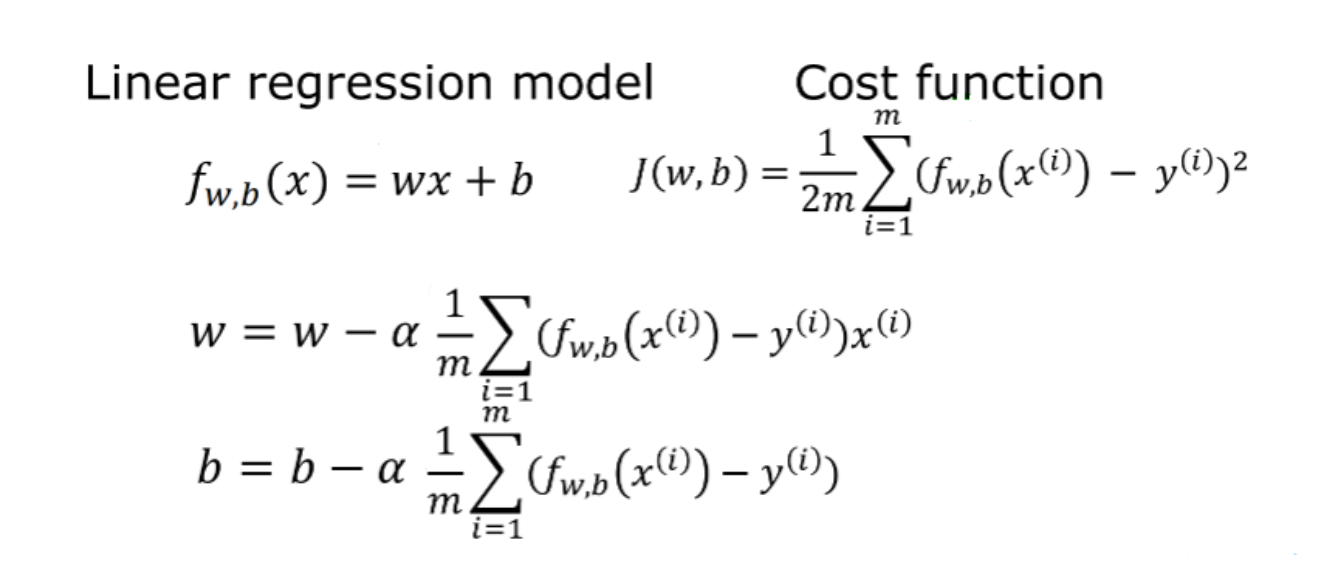

In [8]:
class LinearRegression:
	def __init__(self):
		self.parameters = {}

	def forward_propagation(self, train_input):
		m = self.parameters['m']
		c = self.parameters['c']
		predictions = np.multiply(m, train_input) + c
		return predictions

	def cost_function(self, predictions, train_output):
		cost = np.mean((train_output - predictions) ** 2)
		return cost

	def backward_propagation(self, train_input, train_output, predictions):
		derivatives = {}
		df = (train_output - predictions) * -1
		dm = np.mean(np.multiply(train_input, df))
		dc = np.mean(df)
		derivatives['dm'] = dm
		derivatives['dc'] = dc
		return derivatives

	def update_parameters(self, derivatives, learning_rate):
		self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
		self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

	def train(self, train_input, train_output, learning_rate, iters):
		# Initialize random parameters
		self.parameters['m'] = np.random.uniform(0, 1) * -1
		self.parameters['c'] = np.random.uniform(0, 1) * -1

		# Initialize loss
		self.loss = []

		# Initialize figure and axis for animation
		fig, ax = plt.subplots()
		x_vals = np.linspace(min(train_input), max(train_input), 100)
		line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
						self.parameters['c'], color='red', label='Regression Line')
		ax.scatter(train_input, train_output, marker='o',
				color='green', label='Training Data')

		# Set y-axis limits to exclude negative values
		ax.set_ylim(0, max(train_output) + 1)

		def update(frame):
			# Forward propagation
			predictions = self.forward_propagation(train_input)

			# Cost function
			cost = self.cost_function(predictions, train_output)

			# Back propagation
			derivatives = self.backward_propagation(
				train_input, train_output, predictions)

			# Update parameters
			self.update_parameters(derivatives, learning_rate)

			# Update the regression line
			line.set_ydata(self.parameters['m']
						* x_vals + self.parameters['c'])

			# Append loss and print
			self.loss.append(cost)
			print("Iteration = {}, Loss = {}".format(frame + 1, cost))

			return line,
		# Create animation
		ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)

		# Save the animation as a video file (e.g., MP4)
		#ani.save('linear_regression_A.mp4', writer='ffmpeg')

		plt.xlabel('Input')
		plt.ylabel('Output')
		plt.title('Linear Regression')
		plt.legend()
		plt.show()

		return self.parameters, self.loss


Iteration = 1, Loss = 10877.168940217525
Iteration = 1, Loss = 4939.256393509415


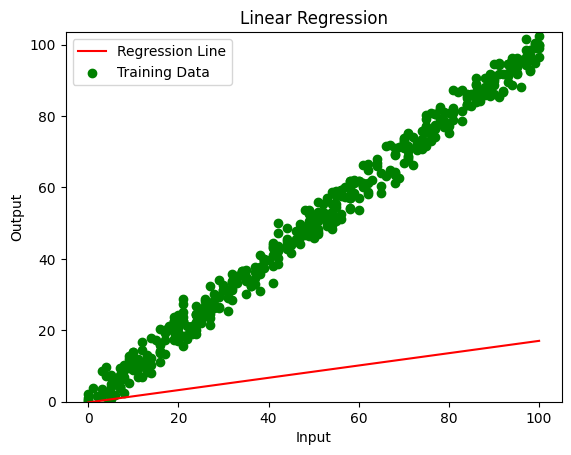

In [9]:
#Example usage
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)


In [12]:
#print(linear_reg.forward_propagation(train_input))

In [13]:
#print(train_output)

In [10]:
print(linear_reg.cost_function(linear_reg.forward_propagation(train_input), train_output))

2245.2188939738367
